In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder2'

In [14]:
df = pd.read_csv("masks_cleaned1.csv")
df.loc[df["State_Tribe_Territory"]=="MN"]

,State_Tribe_Territory,Year,Month,Percent_Public_Face_Mask_Mandate
300,MN,2020,4,0.00
301,MN,2020,5,0.00
302,MN,2020,6,0.00
303,MN,2020,7,25.81
304,MN,2020,8,100.00
305,MN,2020,9,100.00
306,MN,2020,10,100.00
307,MN,2020,11,100.00
308,MN,2020,12,100.00
309,MN,2021,1,100.00


In [15]:
df.loc[df["State_Tribe_Territory"]=="SD"]["Percent_Public_Face_Mask_Mandate"].mean()

0.0

In [16]:
df.loc[df["State_Tribe_Territory"]=="MN"]["Percent_Public_Face_Mask_Mandate"].mean()

68.8175

In [28]:
Dict = {"State":[],"Mask_Mandate":[]}
states = df["State_Tribe_Territory"].unique()
for state in states:
    mask_mandate_mean = df.loc[df["State_Tribe_Territory"]==state]["Percent_Public_Face_Mask_Mandate"].mean()
    Dict["State"].append(state)
    Dict["Mask_Mandate"].append(mask_mandate_mean)

In [29]:
df1 = pd.DataFrame(Dict)
df1.loc[df1["Mask_Mandate"]>80].count()

State           18
Mask_Mandate    18
dtype: int64

In [30]:
df1.loc[df1["Mask_Mandate"]==0].count()

State           11
Mask_Mandate    11
dtype: int64

In [31]:
df1.head()

,State,Mask_Mandate
0,AK,0.000000
1,AL,70.967500
2,AR,69.892500
3,AS,16.369167
4,AZ,0.000000


In [32]:
df1.loc[df1["Mask_Mandate"]==0]

,State,Mask_Mandate
0,AK,0.0
4,AZ,0.0
10,FL,0.0
11,GA,0.0
15,ID,0.0
26,MO,0.0
27,MP,0.0
39,OK,0.0
44,SC,0.0
45,SD,0.0


In [33]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder2'

In [34]:
df2 = pd.read_csv("../Folder4/Output/Adj_for_age_Death_Rate.csv")
df2.drop(columns=("Unnamed: 0"),inplace=True)
df2.head()

,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,0.043606,0.063322,1.452128,0.521335,0.757045
1,UT,0.073363,0.106704,1.454459,0.554209,0.806074
2,NE,0.145057,0.143926,0.992200,1.020306,1.012348
3,VT,0.034616,0.029556,0.853828,1.071802,0.915134
4,ID,0.113035,0.122320,1.082147,1.090293,1.179857


In [38]:
df3 = df1.merge(df2,on="State")
df3.head()

,State,Mask_Mandate,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,0.000000,0.043606,0.063322,1.452128,0.521335,0.757045
1,AL,70.967500,0.212372,0.207580,0.977434,2.063941,2.017367
2,AR,69.892500,0.195009,0.189573,0.972121,1.707780,1.660169
3,AZ,0.000000,0.213197,0.204625,0.959793,2.008587,1.927828
4,CA,78.610833,0.159406,0.172598,1.082753,1.662034,1.799573


In [39]:
mask_mandate_0 = df3.loc[df3["Mask_Mandate"]==0]["Adj_for_age_Covid_Death_Rate"]
mask_mandate_0

0     0.757045
3     1.927828
8     1.282406
9     2.154211
12    1.179857
23    1.411913
35    1.575406
38    1.593170
39    1.511646
40    1.458689
Name: Adj_for_age_Covid_Death_Rate, dtype: float64

In [40]:
mask_mandate_80 = df3.loc[df3["Mask_Mandate"]>80]["Adj_for_age_Covid_Death_Rate"]

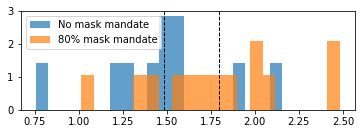

In [41]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_0, 20, density=True, alpha=0.7, label="No mask mandate")
plt.hist(mask_mandate_80, 20, density=True, alpha=0.7, label="80% mask mandate")
plt.axvline(mask_mandate_0.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mask_mandate_80.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [99]:
stats.ttest_ind(mask_mandate_80, mask_mandate_0, equal_var=False)

Ttest_indResult(statistic=2.6821951317304333, pvalue=0.013207343490745269)

In [42]:
df3.Adj_for_age_Covid_Death_Rate.mean()

1.5879344760102099

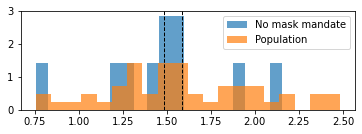

In [43]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_0, 20, density=True, alpha=0.7, label="No mask mandate")
plt.hist(df3.Adj_for_age_Covid_Death_Rate, 20, density=True, alpha=0.7, label="Population")
plt.axvline(mask_mandate_0.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df3.Adj_for_age_Covid_Death_Rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [44]:
stats.ttest_1samp(mask_mandate_0, df3.Adj_for_age_Covid_Death_Rate.mean())

Ttest_1sampResult(statistic=-0.8434981616795353, pvalue=0.4208024545000645)

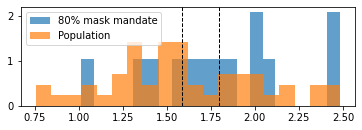

In [45]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_80, 20, density=True, alpha=0.7, label="80% mask mandate")
plt.hist(df3.Adj_for_age_Covid_Death_Rate, 20, density=True, alpha=0.7, label="Population")
plt.axvline(mask_mandate_80.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df3.Adj_for_age_Covid_Death_Rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [104]:
stats.ttest_1samp(mask_mandate_80, df3.Death_Rate.mean())

Ttest_1sampResult(statistic=2.4421113209999334, pvalue=0.025824217165624407)

In [105]:
mask_mandate_80.mean()

1.8829601314703486

In [47]:
df3.head()

,State,Mask_Mandate,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,0.000000,0.043606,0.063322,1.452128,0.521335,0.757045
1,AL,70.967500,0.212372,0.207580,0.977434,2.063941,2.017367
2,AR,69.892500,0.195009,0.189573,0.972121,1.707780,1.660169
3,AZ,0.000000,0.213197,0.204625,0.959793,2.008587,1.927828
4,CA,78.610833,0.159406,0.172598,1.082753,1.662034,1.799573


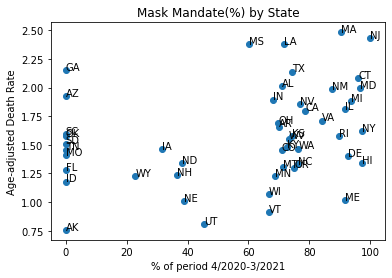

In [81]:
plt.scatter(df3.Mask_Mandate, df3.Adj_for_age_Covid_Death_Rate)
for index, row in df3.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[1],row[6]))
plt.title("Mask Mandate(%) by State")
plt.xlabel("% of period 4/2020-3/2021")
plt.ylabel("Age-adjusted Death Rate")
plt.savefig("../Folder4/Output/Mask_Mandate.png")
plt.show()

In [78]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder2'

In [53]:
df3.loc[df3["Mask_Mandate"]==0]["State"].to_csv("../Folder4/Output/State_with_no_mask_mandate.csv")
df3.loc[df3["Mask_Mandate"]>80]["State"].to_csv("../Folder4/Output/State_with_80%_mask_mandate.csv")

In [83]:
a = df3["Adj_for_age_Covid_Death_Rate"]
a.mean()

1.5879344760102099

In [99]:
b = df3.loc[df3["Mask_Mandate"]>60]["Adj_for_age_Covid_Death_Rate"]
b.mean()

1.6928697813493978

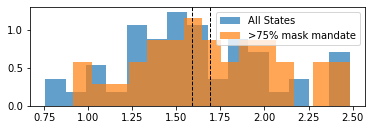

In [100]:
plt.subplot(2, 1, 2)
plt.hist(a, 15, density=True, alpha=0.7, label="All States")
plt.hist(b, 15, density=True, alpha=0.7, label=">75% mask mandate")
plt.axvline(a.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [97]:
stats.ttest_1samp(b, a.mean())

Ttest_1sampResult(statistic=1.765429667995068, pvalue=0.09656535442646355)

In [59]:
df3[["State","Mask_Mandate"]].to_csv("../Folder4/Output/Mask_Mandate%_byState.csv")